# Scalar Backpropagation

**Outline**
1. Use generated data and classes from before
2. Code the back propagation algorithm for our first FF network - single weight and all weights
3. Visualize working of our first FF network
4. Code the back propagation algorithm for a larger FF network
5. Understand the iterative kernel within the back propagation algorithm
6. Exercises

In [2]:
# our custom color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [4]:
# settin the random seed
# If we set the np.random.seed(a_fixed_number) every time you call the numpy's other random function, the result will be the same:
np.random.seed(0)

## Generate Data

In [5]:
# Data for MCC - Multiclass classification
# For further explanation as to what all the features does - refer 3.Feedforward Neuran Network
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


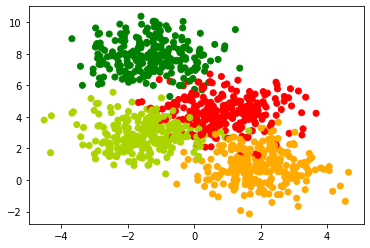

In [6]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [7]:
# Data for BCC - Binary Class Classification
# we could have used the method we used in the 3.Feedforward nerural network, but this also genrated data for BCC
labels_orig = labels
labels = np.mod(labels_orig, 2) # this basicaly take the data and does the mod(one class for even, the other for odd),not a standard approach

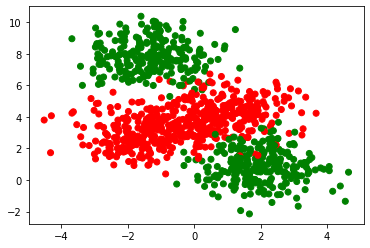

In [8]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

## Test Train split

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


## Backpropogation Algorithm for a single weight in a FNN

Firstly we would like to see what the dericative of the loss fumction is w.r.t w1. Then only update w1 and then see how the network responds with respect to that.

In [10]:
class FFNetworkW1:
  # all values are being initialsied w2-w6 & b1-b3 are not going to be modified at all in this algo
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  # We calculate the forward pass. read notes for for info on forward pass. 
  # The output h3 of the forward pass is actually the output y
  # Correlate with First Network.png
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  '''
  This is the function that we are most interested in while learning
  We get x -  which are the particular x1 and x2 values, y - The ground truth
  there are 3 type of numbers we have been using:
    1. Numbers that we get in the forward pass - a1, a2..., h1, h2 ...
    2. Numbers that we get as part of the input - x (x1, x2), y
    3. Numbers with which we have beein learning in the algo - w1, w2 ..,b1, b2 ...
    
    Also deivative in pythonic notation:
    dh3/da3 - in pythonic notation looks like ---> self.h3*(1-self.h3) - derivative of sigmoid function
  '''
  def grad(self, x, y):
    # The forst thing we need to do in order to compute the gradient is the forward pass.
    self.forward_pass(x)  
    # Here we care computing gradient only for w1
    # This formula for calculating dw1, is the backpropagation chain rule we studied.
    # We apply the chain rule across the path of loss function to w1 and we get this formula
    # note : we are using the square error loss function & 
    # The image FirstNetowrk.png should have had Y^(yhat) on the top as y is actually the ground truth
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
      w1 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      # We iterate over all input that are given to us. For each input we call the grad fuction
      
      for x, y in zip(X, Y):
        self.grad(x, y)
        # We are aggrigating the sel.dw1 value across all inputs inot dw1
        # so dw1 contains the partial dericative of loss w.r.t weight 1
        dw1 += self.dw1

      m = X.shape[0]
      # We use dw to give us the new w1 using the update rule
      self.w1 -= learning_rate * dw1 / m
      
      if display_loss:
        w1[i] = self.w1
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
        
    
    if display_loss:
      plt.tight_layout()
      
      # we are interested to see how w1 changes as epochs move
      plt.subplot(2,1,1)
      plt.plot(w1.values())
      plt.xlabel('Epochs')
      plt.ylabel('W1')
      
      plt.subplot(2,1,2)
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

<ipython-input-10-40a9123bf1f1>:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/500 [00:00<?, ?epoch/s]

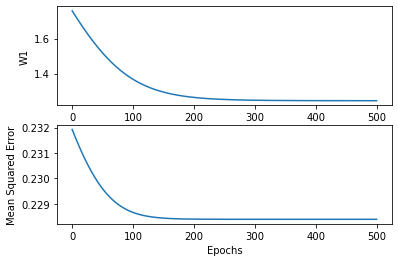

In [11]:
# instanciating the FNN class
ffnw1 = FFNetworkW1()
ffnw1.fit(X_train, Y_train, epochs=500, learning_rate=1, display_loss=True)

* Important thing to note here is that we have updated only w1 as we want to get an intution of how Deep Neural Network works  
* Here we can see that the the gradient decent is working -  the graph is continiously fallinga and finally saturating.  
* If we change only w1 what happens to the error we can see usning the above plot  
* If we would ahve taken all the weights and biases - then the MSE would have decreased or increaseddepending on what is happening accross all the weights and biases, but as we are seeing for only one we are able to see the clean decrease in the weights
* Both these curves are saturating after a point. The weight is saturating at some point which means that the gradient that we have that is the partial dericative of 
  loss wrt weight is commiing close to 0. 
  Either the derivative h3 or h1 is comming close to 0 as they are of the format self.h*(1-self.h)--->y*(1-y) 
  If y becomes closer to 0 or y becomes closer to 1 then the 
  dericative of the sigmoid finction becomes close to 0.(if we recollect the plotting of the sigmoid function then near 0's and 1's the two extremes of the domain
  the sigmoid flattens out meaning it had dercatices close to 0). 
  (We are talking about h1 and h3 as they come in the path of loss function to w1 which we are looking at.)
  If either h1 or h3 come close to 0 or 1 then the weight w1 will stop training as it will not get
  gradients to work with.
  if w1 does noot change the the network is anyway not changing then consiquently MSE will also stop reducing
  
